# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import datasets 

# Build Model

In [2]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [6]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

# Training

In [7]:
num_epochs = 1
batch_size = 64

In [8]:
hist = model.fit(x_train, y_train, 
                 batch_size=batch_size, 
                 shuffle=True)

938/938 [==============================] - 85s 90ms/step - loss: 0.2194 - accuracy: 0.9291


In [9]:
hist.history

{'loss': [0.2194495052099228], 'accuracy': [0.9291166663169861]}

# Evaluating  
- 학습한 모델 확인

In [10]:
model.evaluate(x_test, y_test, batch_size=batch_size)

157/157 [==============================] - 3s 18ms/step - loss: 0.0417 - accuracy: 0.9854


[0.0417352057993412, 0.9854000210762024]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
test_image = x_test[0, :, :, 0]
test_image.shape

(28, 28)

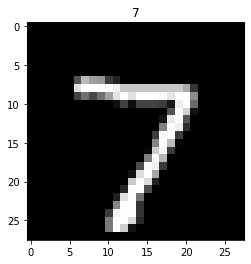

In [13]:
plt.title(y_test[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [14]:
test_image.shape

(28, 28)

In [15]:
pred = model.predict(test_image.reshape(1, 28, 28, 1)) # evaluation mode로 자동 변환

In [16]:
pred.shape

(1, 10)

In [17]:
pred

array([[3.4627328e-09, 9.8820578e-08, 3.2625181e-07, 3.8887155e-08,
        4.4075907e-09, 2.5299840e-10, 5.7708271e-13, 9.9999917e-01,
        6.0740030e-10, 3.1018493e-07]], dtype=float32)

- np.argmax

In [18]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [19]:
test_batch = x_test[:32]
test_batch.shape

(32, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [20]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

- 결과 확인

In [21]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1], dtype=int64)

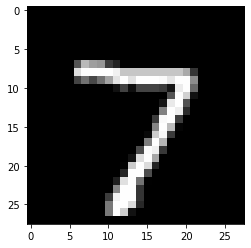

In [22]:
plt.imshow(test_batch[0, :, :, 0], 'gray')
plt.show()